In [2]:
import pandas as pd
import utils.preprocessing as pp
import utils.constants as c
import utils.visualization as vis

In [19]:
import importlib

importlib.reload(pp)
importlib.reload(c)
importlib.reload(vis)

<module 'utils.visualization' from 'd:\\FERI\\transfer-learning\\src\\utils\\visualization.py'>

In [5]:
countries = [
    "Afghanistan",
    "Bangladesh",
    "India",
    "Indonesia",
    "Lao",
    "Pakistan",
    "Tajikistan",
]

In [6]:
datasets = c.get_countries(countries, 'Rice')
dfs = []

In [8]:
for dataset in datasets:
    df = pd.read_csv(dataset['raw'])       
    df = pp.sort_extract_price(df, 'Rice', dataset['criteria'])
    df.to_csv(dataset['processed'], index=False)
    dfs.append(df)

C:\Users\user\AppData\Local\Temp\ipykernel_8892\1888482166.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])
C:\Users\user\AppData\Local\Temp\ipykernel_8892\1888482166.py:2: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset['raw'])


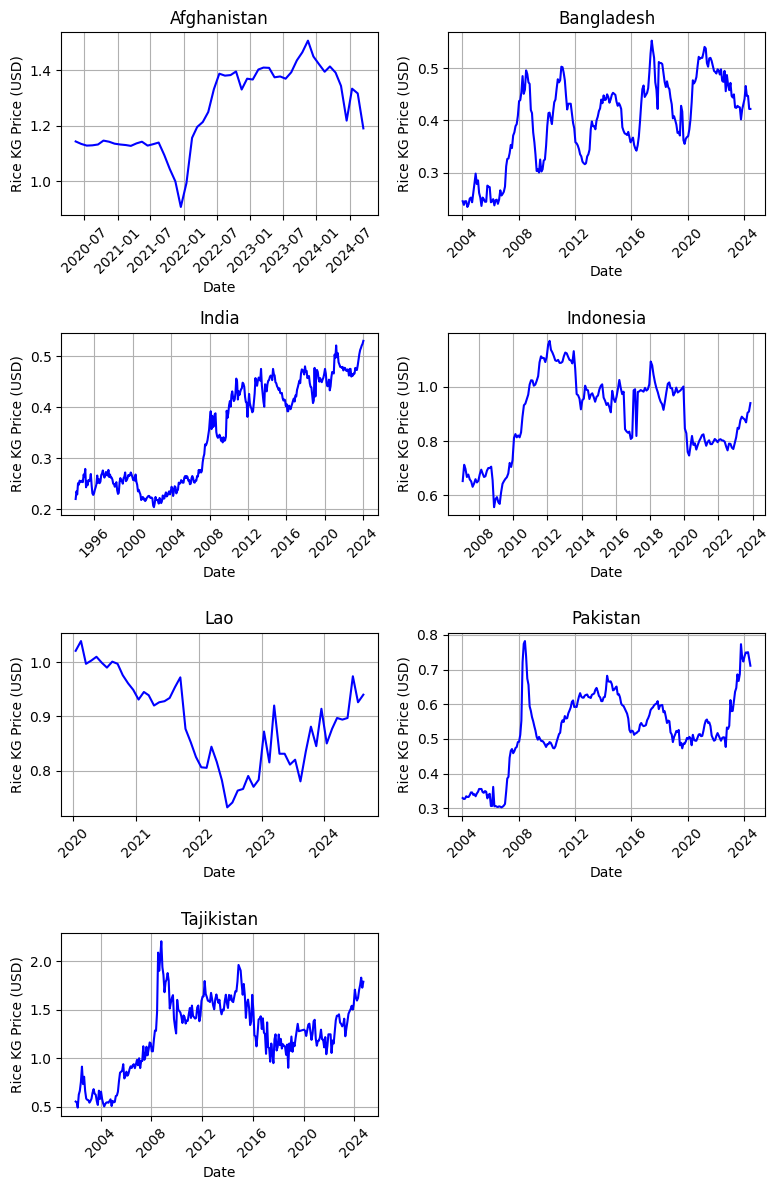

In [9]:
vis.plot_line_charts(dfs, "date", "usdprice", countries, "Date", "Rice KG Price (USD)")

In [10]:
for i, dataset in enumerate(countries):
    pp.check_normality(dfs[i]["usdprice"], countries[i])

Afghanistan: Statistics=0.821, p=0.000, Not normal
Bangladesh: Statistics=0.593, p=0.000, Not normal
India: Statistics=0.581, p=0.000, Not normal
Indonesia: Statistics=0.711, p=0.000, Not normal
Lao: Statistics=0.768, p=0.000, Not normal
Pakistan: Statistics=0.619, p=0.000, Not normal
Tajikistan: Statistics=0.689, p=0.000, Not normal


In [21]:
country = "Pakistan"
dataset = c.get_country(country, 'Rice')
df = pd.read_csv(dataset["raw"])

df1 = pp.sort_extract_price_market(df, "Rice", "Quetta")
df1.to_csv(c.get_market_data("Quetta"), index=False)


df2 = pp.sort_extract_price_market(df, "Rice", "Karachi")
df2.to_csv(c.get_market_data("Karachi"), index=False)

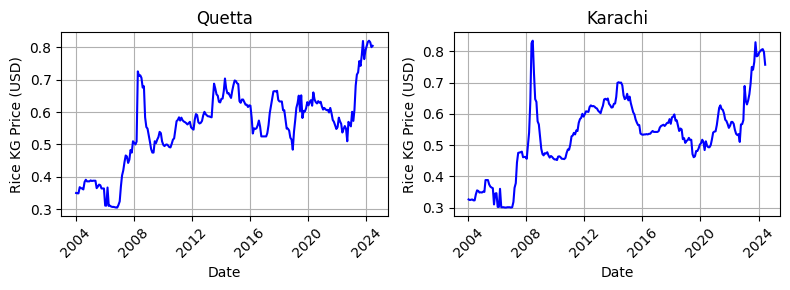

In [18]:
dfs = [df1, df2]
vis.plot_line_charts(
    dfs, "date", "usdprice", ["Quetta", "Karachi"], "Date", "Rice KG Price (USD)"
)